<a href="https://colab.research.google.com/github/GREY-59/azure-sdk-for-python/blob/main/TSLA-Prediction-11/22/2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet as Prophet

data=pd.read_csv("/content/TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-23,503.500000,526.000000,501.790009,521.849976,521.849976,50260300
1,2020-11-24,540.400024,559.989990,526.200012,555.380005,555.380005,53648500
2,2020-11-25,550.059998,574.000000,545.369995,574.000000,574.000000,48930200
3,2020-11-27,581.159973,598.780029,578.450012,585.760010,585.760010,37561100
4,2020-11-30,602.210022,607.799988,554.510010,567.599976,567.599976,63003100


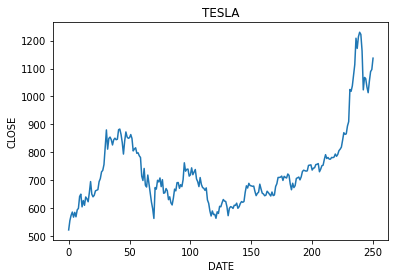

In [2]:
close=data['Close']
ax=close.plot(title="TESLA")
ax.set_xlabel("DATE")
ax.set_ylabel("CLOSE")
plt.show()

In [4]:
data["Date"]=pd.to_datetime(data["Date"],infer_datetime_format=True)
data=data[["Date","Close"]]

In [5]:
data=data.rename(columns={"Date":"ds","Close":"y"})

In [8]:
model=Prophet.Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat_lower,yhat_upper
611,2022-11-15,2078.928140,3833.907088
612,2022-11-16,2108.223398,3852.990025
613,2022-11-17,2111.457758,3847.787559
614,2022-11-18,2112.616632,3872.320426
615,2022-11-19,2077.928076,3833.379498


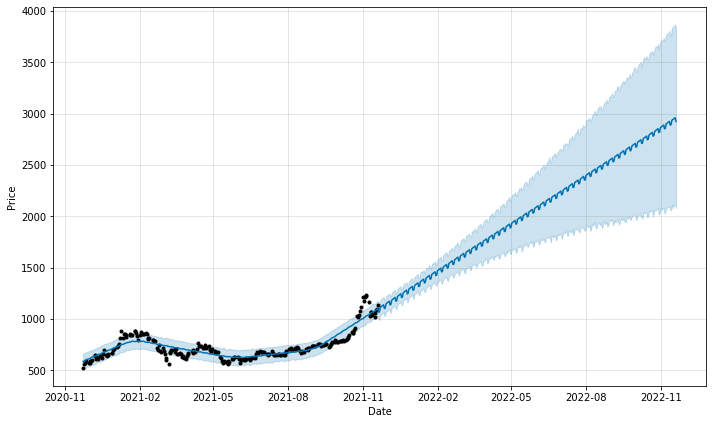

In [9]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")